In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


## EDA

In [4]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [8]:
label_enc=LabelEncoder()
label_enc

LabelEncoder()

In [9]:
df['Fuel_Type']=label_enc.fit_transform(df['Fuel_Type'])

In [10]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [11]:
df.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,1.868990,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,0.370993,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,2.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,2.000000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


## Split the dataset into training and testing sets 

In [12]:
target=df[['Price']]
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [13]:
features=df.drop('Price',axis=1)
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


In [14]:
std_sca=StandardScaler()
std_sca

StandardScaler()

In [15]:
features=std_sca.fit_transform(features)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 10)
(359, 10)
(1076, 1)
(359, 1)


## Model Building

In [18]:
lin_reg=LinearRegression()

In [19]:
lin_reg.fit(x_train,y_train)

LinearRegression()

## Evaluation

In [20]:
# Training data prediction
y_pred=lin_reg.predict(x_train)
y_pred

array([[ 9296.56193196],
       [ 8661.838731  ],
       [ 7486.0171292 ],
       ...,
       [12821.92092484],
       [15359.62391805],
       [10027.92290881]])

In [21]:
# Testing data prediction
y_pred1=lin_reg.predict(x_test)
y_pred1

array([[15500.89005501],
       [10759.23904385],
       [13086.71749556],
       [10448.43859762],
       [ 8047.90646867],
       [ 9506.38331493],
       [13857.51147265],
       [ 6381.15701993],
       [13253.98072221],
       [ 8489.63668088],
       [13232.16622395],
       [ 7769.73079067],
       [11494.05206471],
       [ 5047.06650907],
       [18016.90157842],
       [ 8300.69422622],
       [13508.83974784],
       [15511.12234232],
       [16595.14074262],
       [ 9355.57383006],
       [12431.95014164],
       [10855.5392788 ],
       [10842.67250269],
       [11780.04930749],
       [ 8348.79397898],
       [ 8264.56937451],
       [ 9805.17807796],
       [ 8413.29892027],
       [ 9456.60955335],
       [ 8077.5968401 ],
       [ 9095.41560284],
       [12002.72958251],
       [ 6550.67761104],
       [19027.98831318],
       [ 9480.33847638],
       [ 9444.84460169],
       [ 7192.81499423],
       [ 8069.82124668],
       [14148.37754332],
       [10659.1746138 ],


In [22]:
# Training accuracy
r2_score(y_train,y_pred)

0.8604472806002952

In [23]:
# Testing accuracy
r2_score(y_test,y_pred1)

0.8722609389806816

In [24]:
lin_reg.intercept_

array([10717.79715849])

In [25]:
lin_reg.coef_

array([[-2.30930548e+03, -6.36258588e+02,  1.74269745e+02,
         3.95795620e+02,  1.01481552e+02, -6.67830247e+00,
        -5.00178814e+00,  7.10542736e-14,  1.40469112e+02,
         9.99841900e+02]])

## Lasso

In [26]:
lasso_model=Lasso(alpha=1)

In [27]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=1)

In [28]:
lasso_y_pred=lasso_model.predict(x_test)

In [29]:
lasso_r2=r2_score(y_test,lasso_y_pred)
lasso_r2

0.8722251743526402

## Ridge

In [30]:
ridge_model=Ridge(alpha=1)

In [31]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=1)

In [32]:
ridge_y_pred=ridge_model.predict(x_test)

In [33]:
ridge_r2=r2_score(y_test,ridge_y_pred)
ridge_r2

0.8722336362132188

#### Visualizations

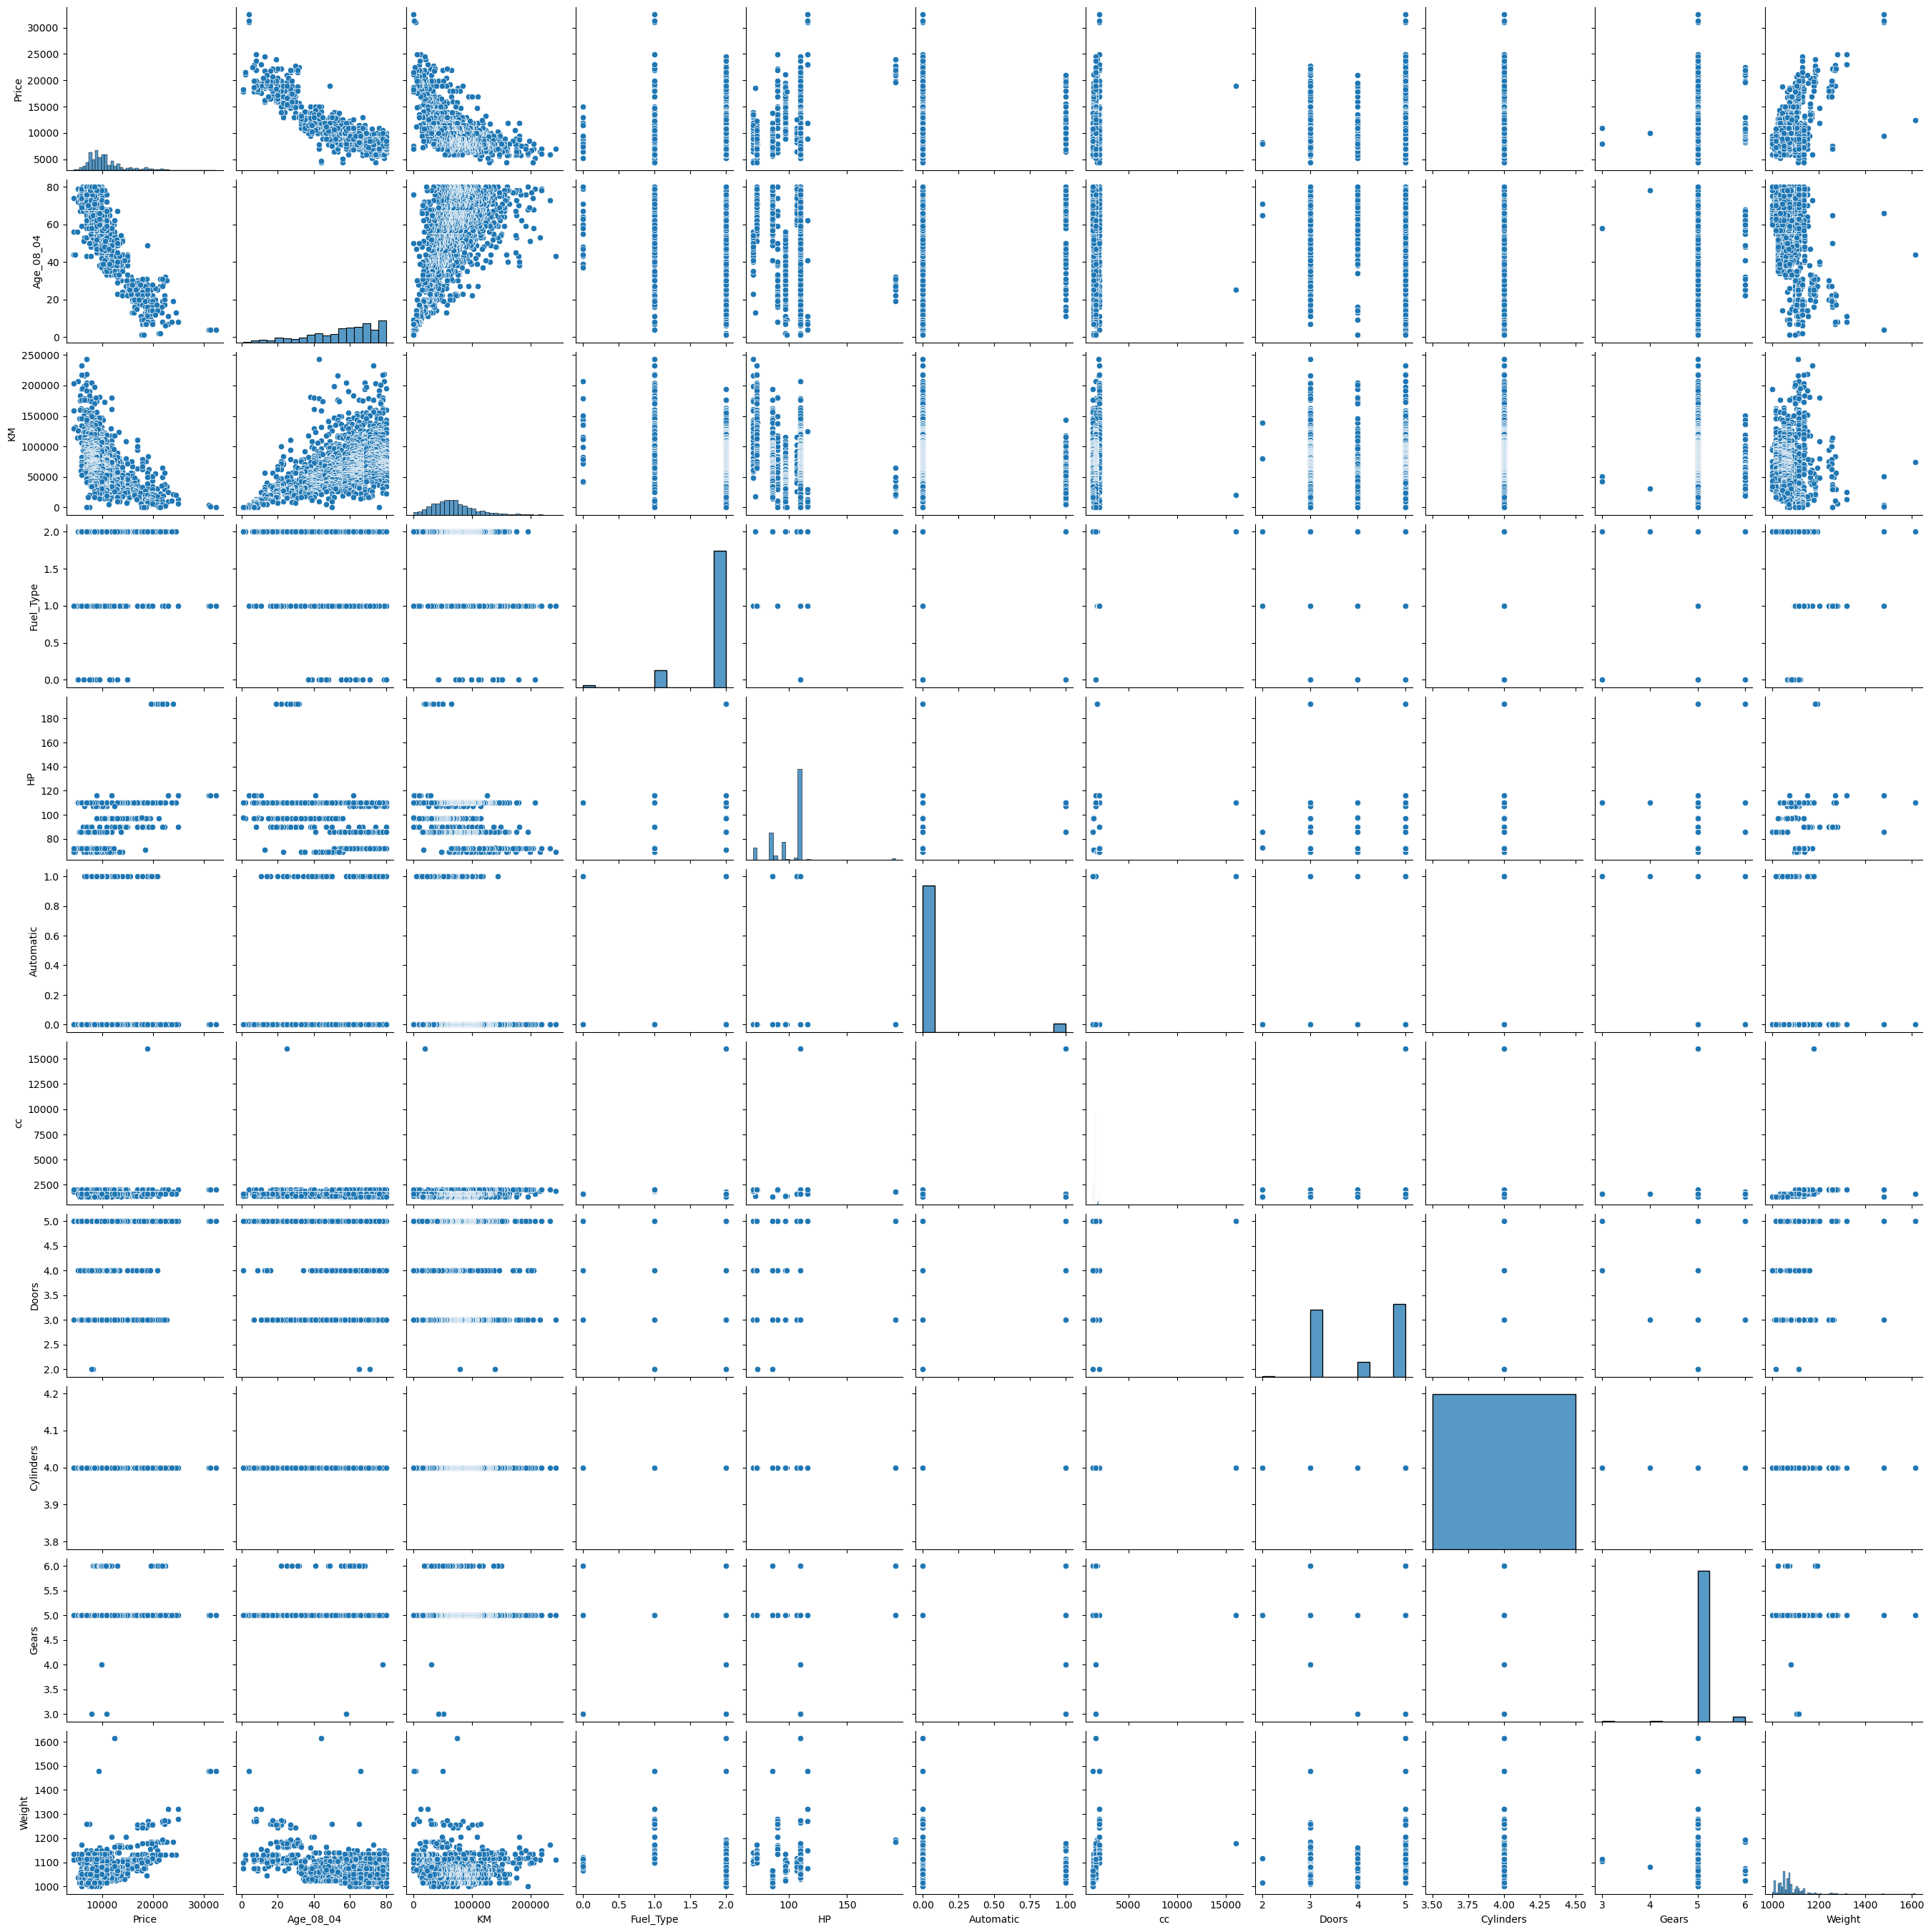

In [34]:
sns.pairplot(df)

<Axes: xlabel='Price'>

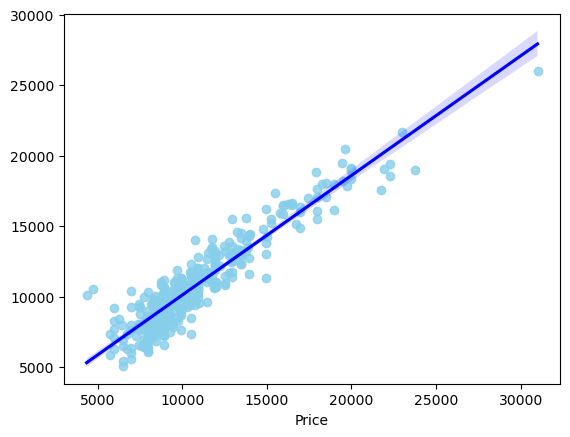

In [35]:
sns.regplot(data=df,x=y_test,y=y_pred1,scatter_kws={'color':'skyblue'},line_kws={'color':'blue'})

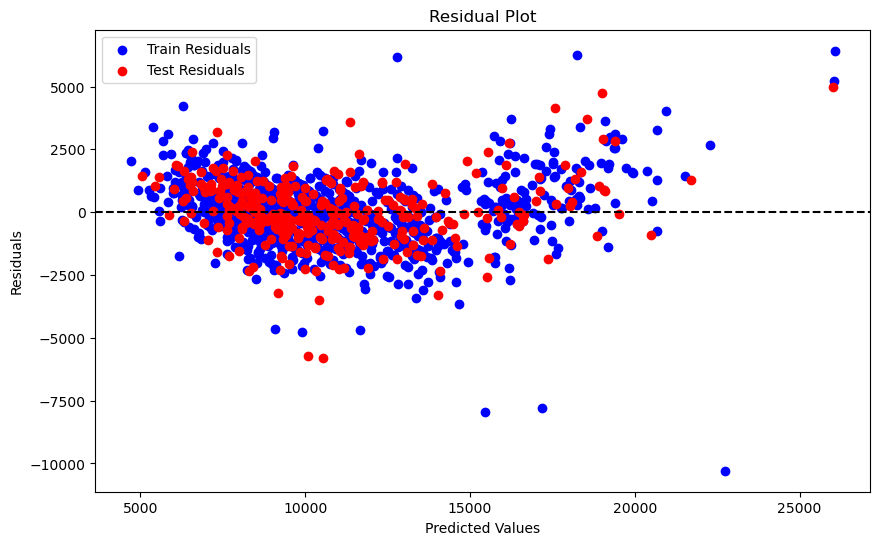

In [36]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_train - y_pred, color="blue", label="Train Residuals")
plt.scatter(y_pred1, y_test - y_pred1, color="red", label="Test Residuals")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

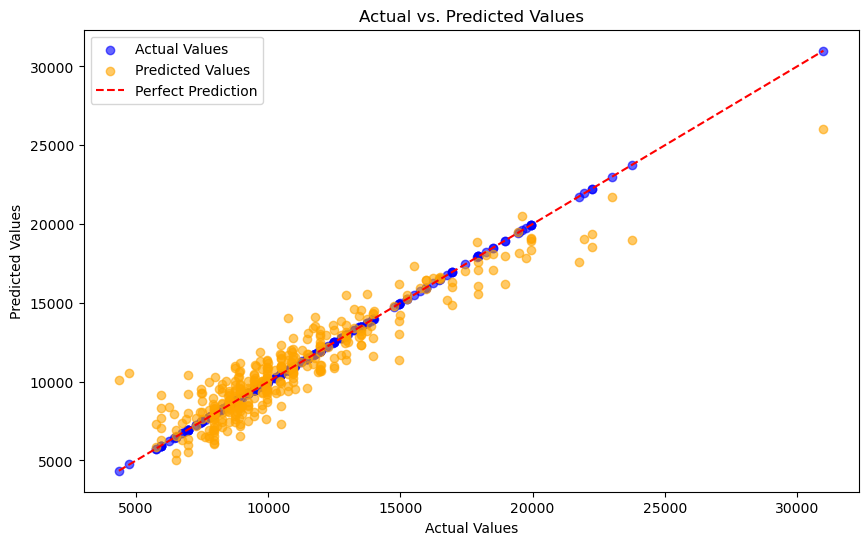

In [37]:
# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color="blue", label="Actual Values", alpha=0.6)
plt.scatter(y_test, y_pred1, color="orange", label="Predicted Values", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

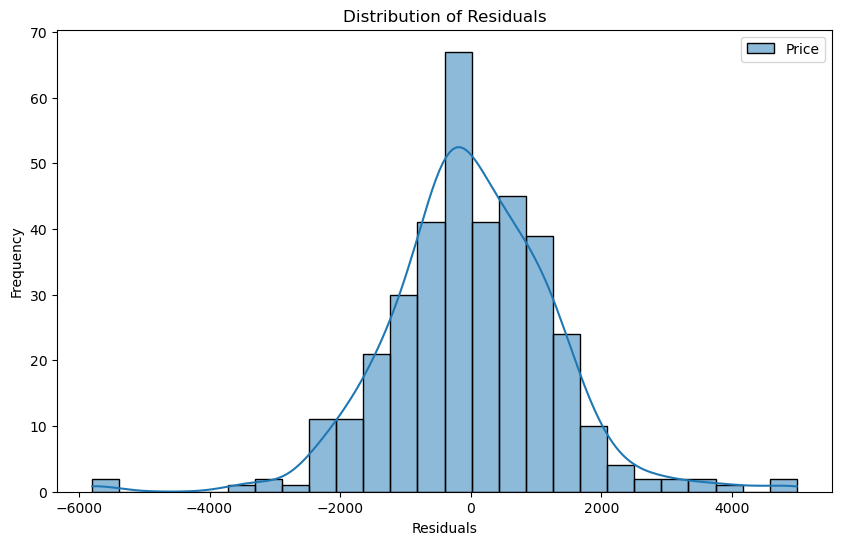

In [38]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred1, kde=True, color="purple")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Interview Questions

1.What is Normalization & Standardization and how is it helpful?

Normalization

Normalization rescales the values of numeric features to a common range, typically [0, 1]. This is done by subtracting the minimum value of the feature and dividing by the range (the difference between the maximum and minimum values).

Standardization

Standardization transforms features to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature and dividing by the standard deviation.

Why are They Helpful?

Improving Model Performance: Many machine learning algorithms, such as gradient descent-based methods, are sensitive to the scale of the features. Normalization or standardization ensures that the model converges faster and performs better.

Equal Feature Contribution: Without scaling, features with larger ranges can dominate the model's decisions, which can lead to suboptimal results. By normalizing or standardizing, each feature contributes equally to the model's outcome.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Remove One of the Correlated Variables: Once identified, you can consider removing one of the correlated predictors. This simplifies the model and reduces multicollinearity.

Use Principal Components as Predictors: These components can then be used as predictors in the regression model, thereby eliminating multicollinearity.

Regularization Parameter (Alpha): The strength of the penalty is controlled by a regularization parameter (alpha). Ridge regression does not eliminate variables but reduces their influence.

Feature Selection: Lasso is particularly useful when you want to identify the most important predictors among a large set of correlated variables.

Remove or Combine Variables: If a predictor has a high VIF(Variance Inflation Factor), we can consider removing it or combining it with other variables to reduce multicollinearity.